In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split. 

In [2]:
si = pd.read_csv("whole_df.csv")
si.sale_date = pd.to_datetime(si.sale_date.apply(lambda x: x[:-13]))
si = si.set_index('sale_date').sort_index()
si = si.drop(columns="Unnamed: 0")
si['month'] = si.index.month_name()
si['day_of_the_week'] = si.index.day_name()
si['sales_total'] = si.sale_amount * si.item_price
si


,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_the_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,21.0,619014,735 SW Military Dr,San Antonio,9,TX,78221,December,Sunday,87.57
2017-12-31,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,32.0,620840,8503 NW Military Hwy,San Antonio,10,TX,78231,December,Sunday,133.44
2017-12-31,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,55.0,622666,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,December,Sunday,285.45


In [3]:
si.index.min(), si.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [6]:
si.columns

Index(['item_brand', 'item_id', 'item_name', 'item_price', 'item_upc12',
       'item_upc14', 'sale_amount', 'sale_id', 'store_address', 'store_city',
       'store_id', 'store_state', 'store_zipcode', 'month', 'day_of_the_week',
       'sales_total'],
      dtype='object')

<AxesSubplot:xlabel='sale_date'>

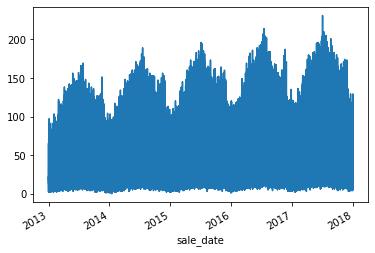

In [8]:
si.sale_amount.plot()

<AxesSubplot:xlabel='sale_date'>

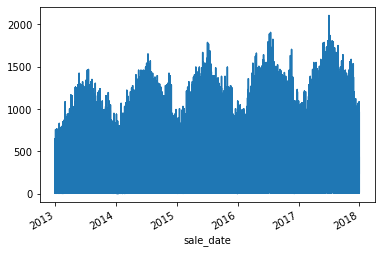

In [10]:
si.sales_total.plot()

# split

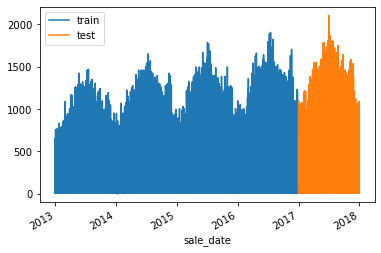

In [13]:
train = si.loc[:'2016']
test = si.loc['2017']

ax = train.sales_total.plot(label = 'train')
test.sales_total.plot(ax=ax, label = 'test')
plt.legend()